<a href="https://colab.research.google.com/github/Eserhimas/Basics/blob/main/ML_Basics_Decision_Tree_Regressor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.tree import export_graphviz
import pydotplus

In [2]:
from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"eserhimas","key":"bf0067bcb038fbefc5960dcdbdb6d94b"}'}

In [3]:
!mkdir ~/.kaggle

!cp kaggle.json ~/.kaggle/

In [4]:
!chmod 600 ~/.kaggle/kaggle.json

In [5]:
!kaggle datasets download -d vikrishnan/boston-house-prices

  0% 0.00/12.8k [00:00<?, ?B/s]
100% 12.8k/12.8k [00:00<00:00, 11.6MB/s]


In [6]:
!unzip "/content/boston-house-prices.zip" -d "/content/"

Archive:  /content/boston-house-prices.zip
  inflating: /content/housing.csv    


In [10]:
columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
           'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data = pd.read_csv('housing.csv', header=None, delimiter=r"\s+", names=columns)

data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


Text(0, 0.5, 'Median Value of Home')

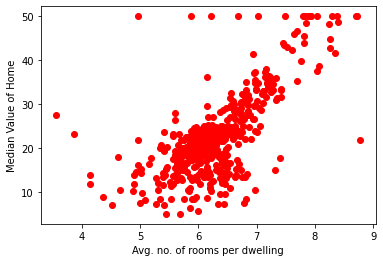

In [11]:
plt.scatter(x=data.RM, y=data.MEDV, color='red')
plt.xlabel('Avg. no. of rooms per dwelling')
plt.ylabel('Median Value of Home')

In [12]:
X=pd.DataFrame(data.RM) # variables
y=pd.DataFrame(data.MEDV) # target

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
dt_reg = DecisionTreeRegressor(criterion='mse',random_state=42, max_depth=4, min_samples_leaf=1)
dt_reg.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(


DecisionTreeRegressor(criterion='mse', max_depth=4, random_state=42)

In [25]:
export_graphviz(dt_reg, out_file='reg_tree.dot')

In [26]:
y_pred = dt_reg.predict(X_test)

In [27]:
print(y_pred[4:9])
print(y_test[4:9])

[19.66084656 19.66084656 19.66084656 19.66084656 19.66084656]
     MEDV
452  16.1
76   20.0
316  17.8
140  14.0
471  19.6


In [29]:
mse = mean_squared_error(y_pred, y_test)

rmse = np.sqrt(mse)

In [30]:
rmse

6.10709009607656